In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit
from astropy import units as u
import math
%matplotlib inline
plt.rcParams['agg.path.chunksize'] = 10000

In [6]:
def plot_hist(array,bin_num):
    n, bins, patches = plt.hist(array,bins=bin_num)
    plt.close()
    return bins, n

In [7]:
def make_graphs(file_str, nbins, title_str = None, save_str = 'images/null', x_lim = None, w = 20, h =10, colour='k'):
    array = np.load(file_str)
    print(array.shape)
    # create histogram and convert from arcminutes to arcseconds
    bins, n = plot_hist([row[1]*60. for row in array],nbins)
      
   
    step = 0.5*(bins[1]-bins[0])
    
    fig = plt.figure(figsize=(w,h))
    plt.plot(bins[:-1]+step, n, colour)
    plt.xlabel('Distance (arcseconds)', fontsize ='12' )
    plt.ylabel('Frequency', fontsize ='12')
    if title_str != None:
        plt.title(title_str)
    plt.xlim(0,x_lim)
    #plt.savefig(save_str)
    
    return 

(590093, 7)


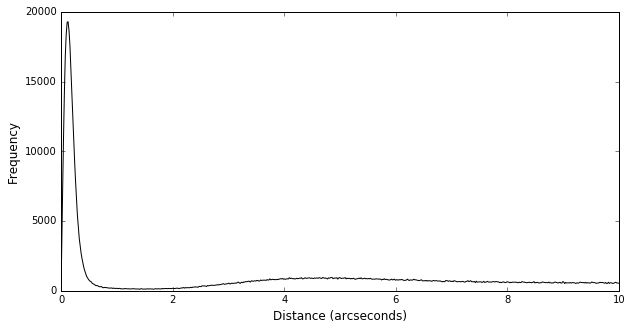

In [8]:
all_sdss = make_graphs('/home/calum/Documents/Mphys_data/mgs_multiwavelength/xmatch_all_sdss.npy',600, w=10, h=5,save_str='images/all_sdss.png')
plt.savefig('images/all_sdss.png')

(206189, 7)


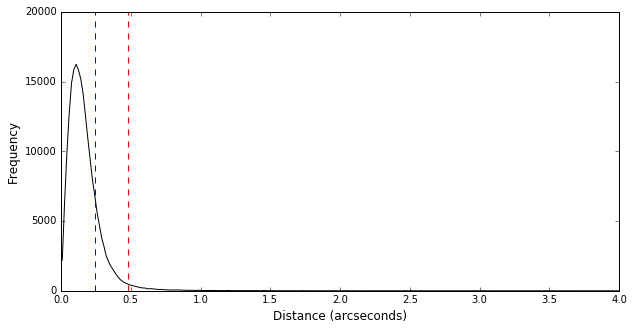

In [9]:
sdss_ukidds = make_graphs('/home/calum/Documents/Mphys_data/mgs_multiwavelength/xmatch_nearest_sdss.npy',600, w=10,h=5, x_lim=4)
plt.plot((0.24,0.24),(0,20000),'b--')
plt.plot((0.48,0.48),(0,20000),'r--')
plt.savefig('images/sdss_ukidds.png')

(205839, 7)


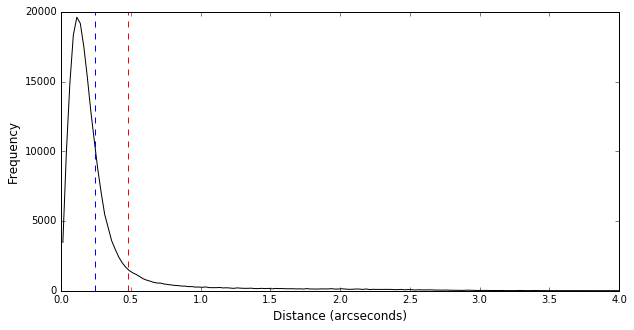

In [10]:
wise_ukidds = make_graphs('/home/calum/Documents/Mphys_data/mgs_multiwavelength/xmatch_nearest_wise.npy',600, w=10,h=5, x_lim=4)
plt.plot((0.24,0.24),(0,20000),'b--')
plt.plot((0.48,0.48),(0,20000),'r--')
plt.savefig('images/wise_ukidds.png')

(162796, 7)


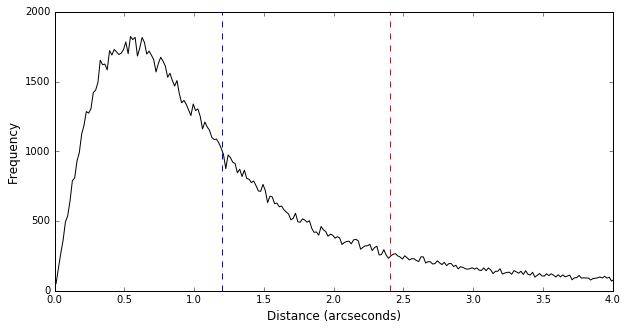

In [11]:
galex_ukidds = make_graphs('/home/calum/Documents/Mphys_data/mgs_multiwavelength/xmatch_nearest_galex.npy',600, w=10,h=5, x_lim=4)
plt.plot((1.2,1.2),(0,2000),'b--')
plt.plot((2.4,2.4),(0,2000),'r--')
plt.savefig('images/galex_ukidds.png')

(590093, 7)
(206189, 7)


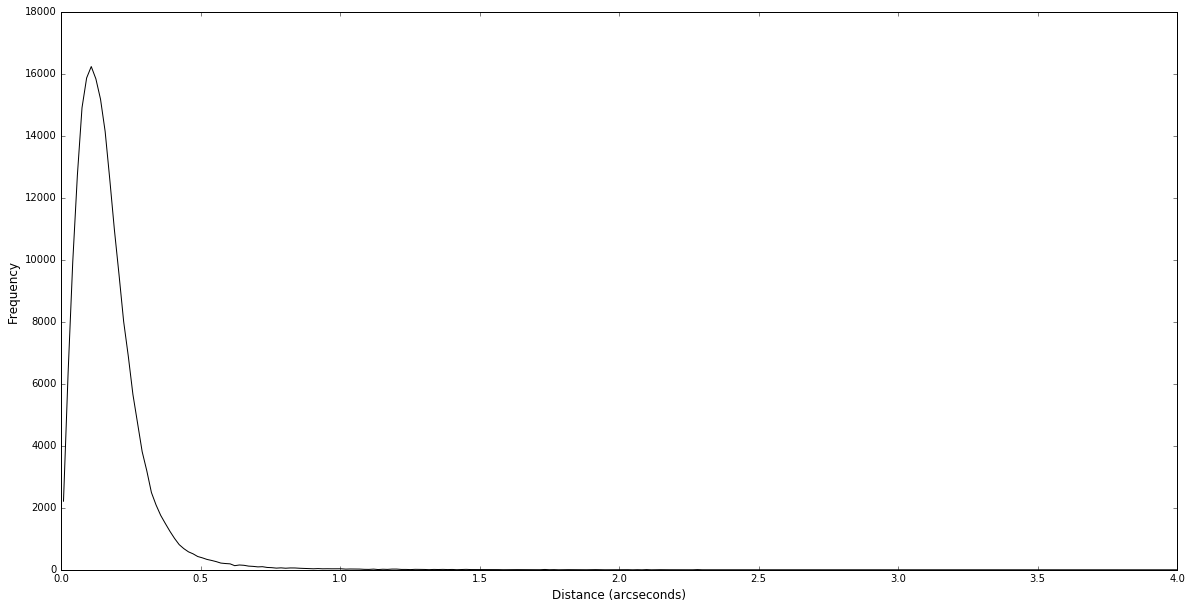

In [12]:
plt.figure(figsize=(20,40))
plt.subplot(211)
make_graphs('/home/calum/Documents/Mphys_data/mgs_multiwavelength/xmatch_all_sdss.npy',600, save_str='images/all_sdss.png')
plt.subplot(212)
make_graphs('/home/calum/Documents/Mphys_data/mgs_multiwavelength/xmatch_nearest_sdss.npy',600, w=20,h=10, x_lim=4)


(206189, 7)


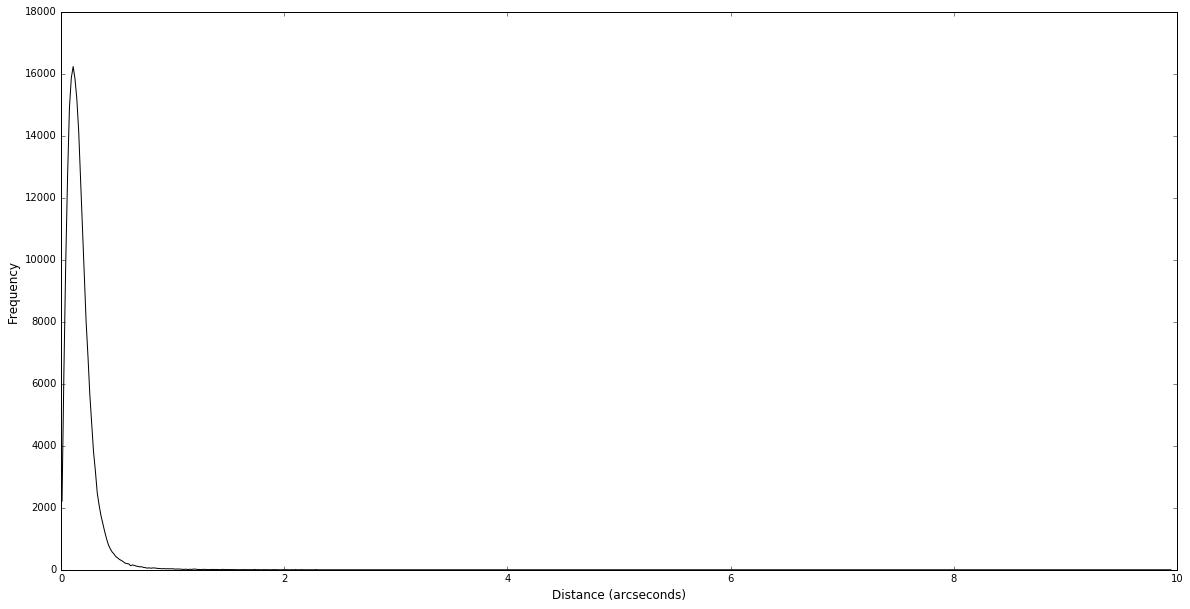

In [13]:
make_graphs('/home/calum/Documents/Mphys_data/mgs_multiwavelength/xmatch_nearest_sdss.npy',600)

(201406, 7)


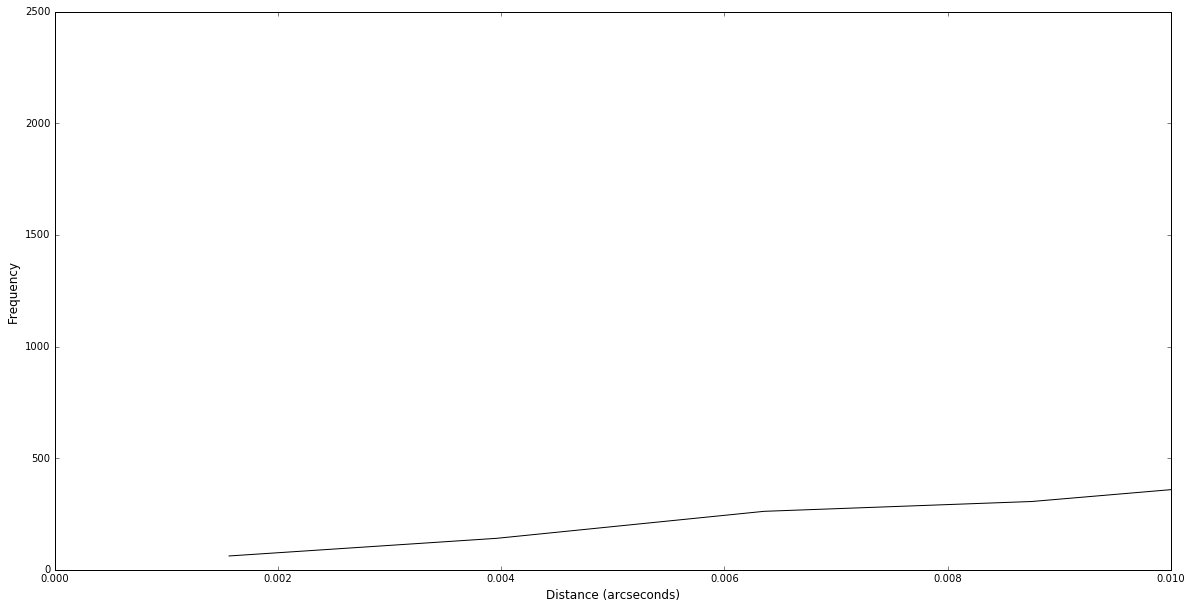

In [14]:
make_graphs('/home/calum/Documents/Mphys_data/mgs_multiwavelength/xmatch_large_sdss.npy',200, x_lim=0.01)

(167665, 7)


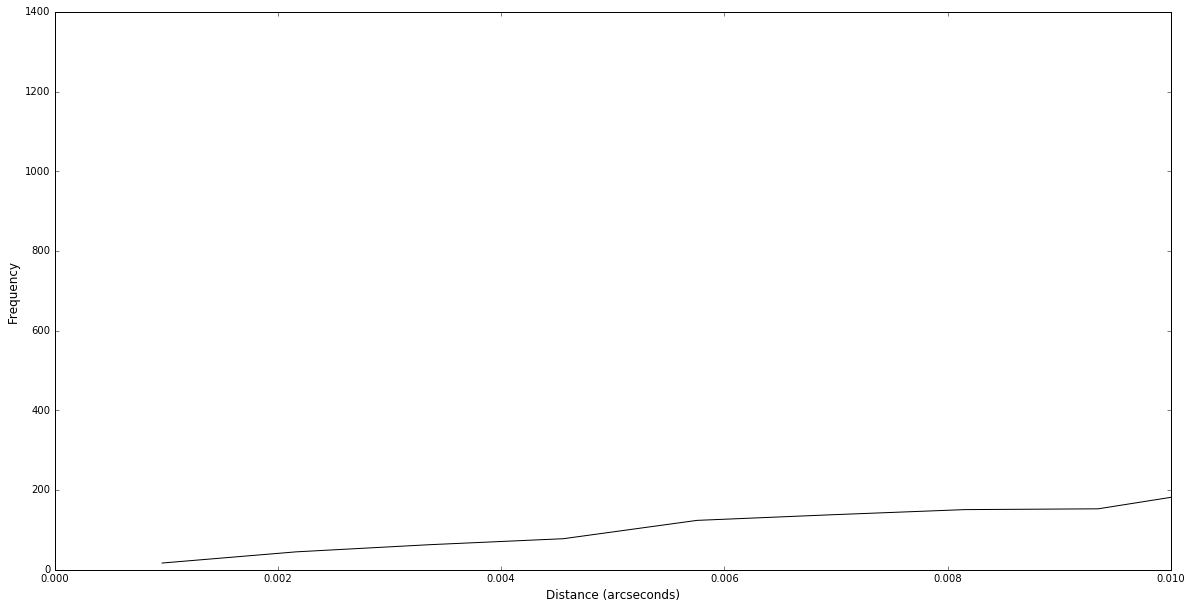

In [15]:
make_graphs('/home/calum/Documents/Mphys_data/mgs_multiwavelength/xmatch_small_sdss.npy',200, x_lim=0.01)

In [95]:
def ra_dec_graph(filename, limit = None):
    array = np.load(filename)
    # get ra and dec from las and sdss
    match_x = []
    match_y = []
    
    i = 0
    
    for row in array:
        i+=1
        del_ra = row[2]-row[4]
        del_dec = row[3]-row[5]
        # convert to arcseconds from arcmins
        match_x.append(del_dec*60)
        # convert arcminutes to radians
        match_y.append(del_ra*60*math.cos(row[5]*(1/60)*(2*math.pi)))
        if i == 1:
            print(match_y[0])
        
    plt.figure(figsize=(20,20))
    plt.plot(match_x,match_y,'g+')
    if limit != None:
        plt.ylim(-1*limit,limit)
        plt.xlim(-1*limit,limit)
    plt.grid(linestyle='-')
    plt.xlabel('$\Delta \delta$',fontsize='20')
    plt.ylabel(r'$\Delta \alpha cos(\delta)$',fontsize='20')
    plt.savefig('sdss_nearest_ra_dec.png')
    print(len(match_x))

-0.00203594729785
590093


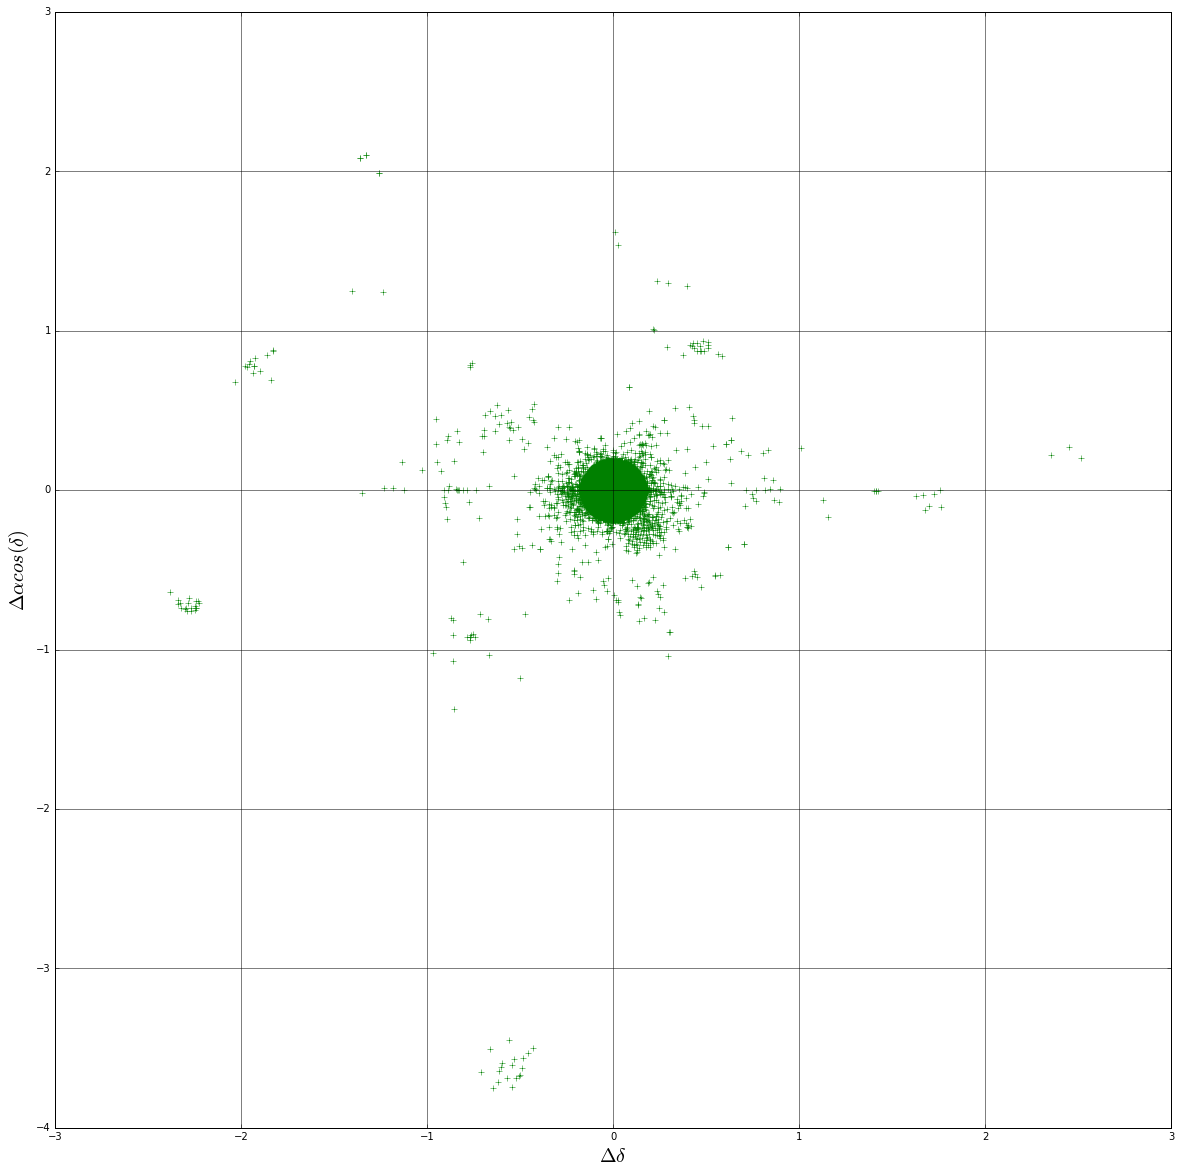

In [114]:
ra_dec_graph('/home/calum/Documents/Mphys_data/mgs_multiwavelength/xmatch_all_sdss.npy')
plt.savefig('images/offset_sdss_all.png')

0.000525654329309
201406


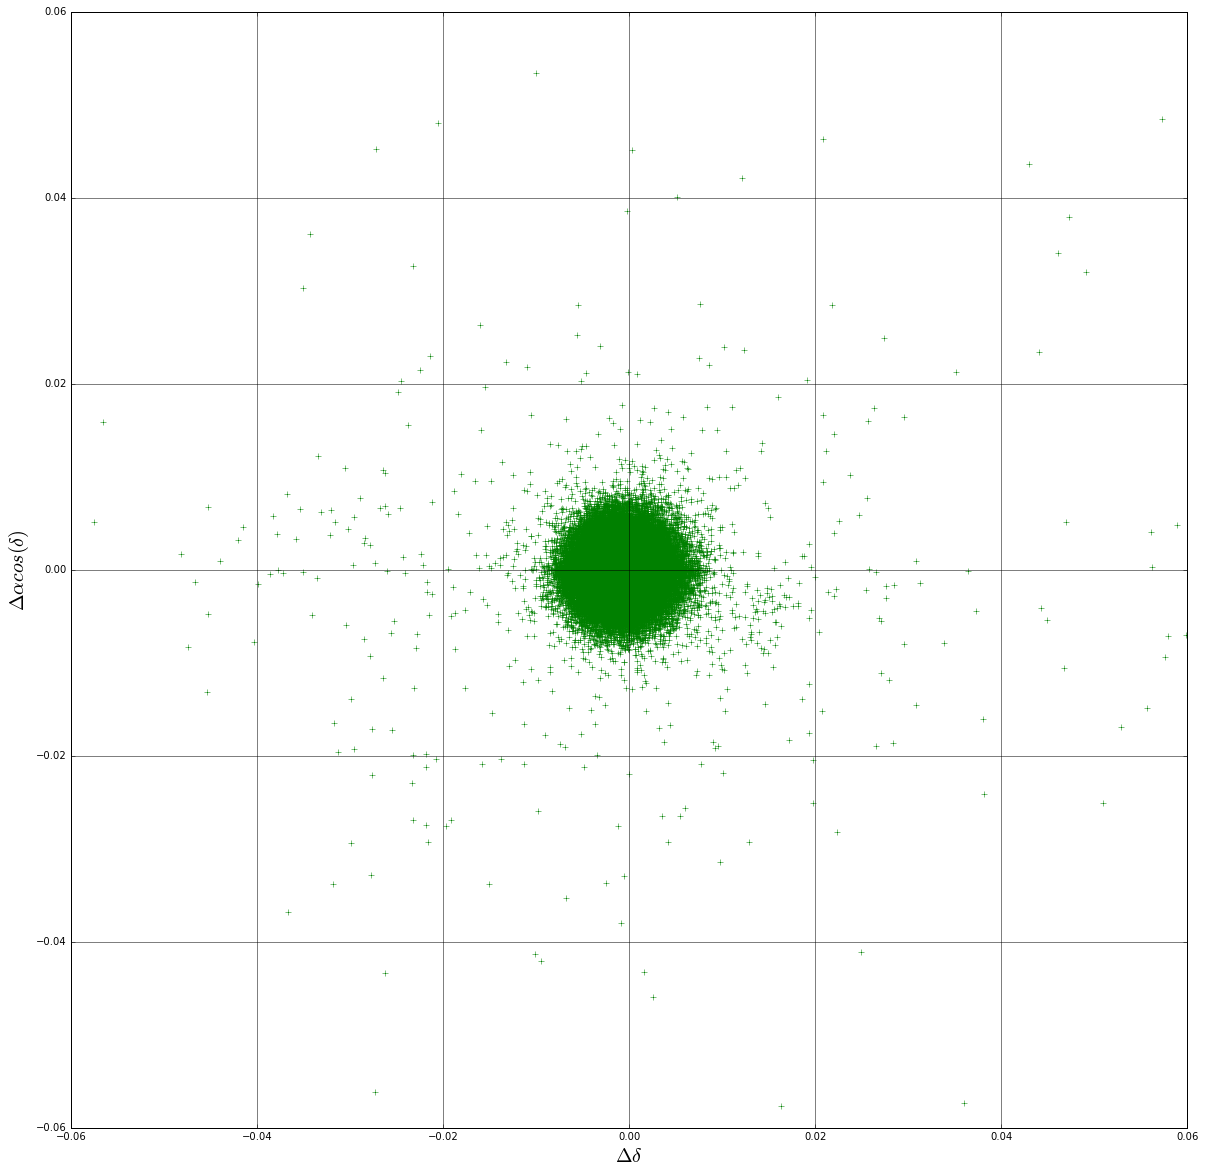

In [132]:
ra_dec_graph('/home/calum/Documents/Mphys_data/mgs_multiwavelength/xmatch_large_sdss.npy',limit=0.06)
plt.savefig('images/offset_sdss_large.png')

-0.00324343687614
135232


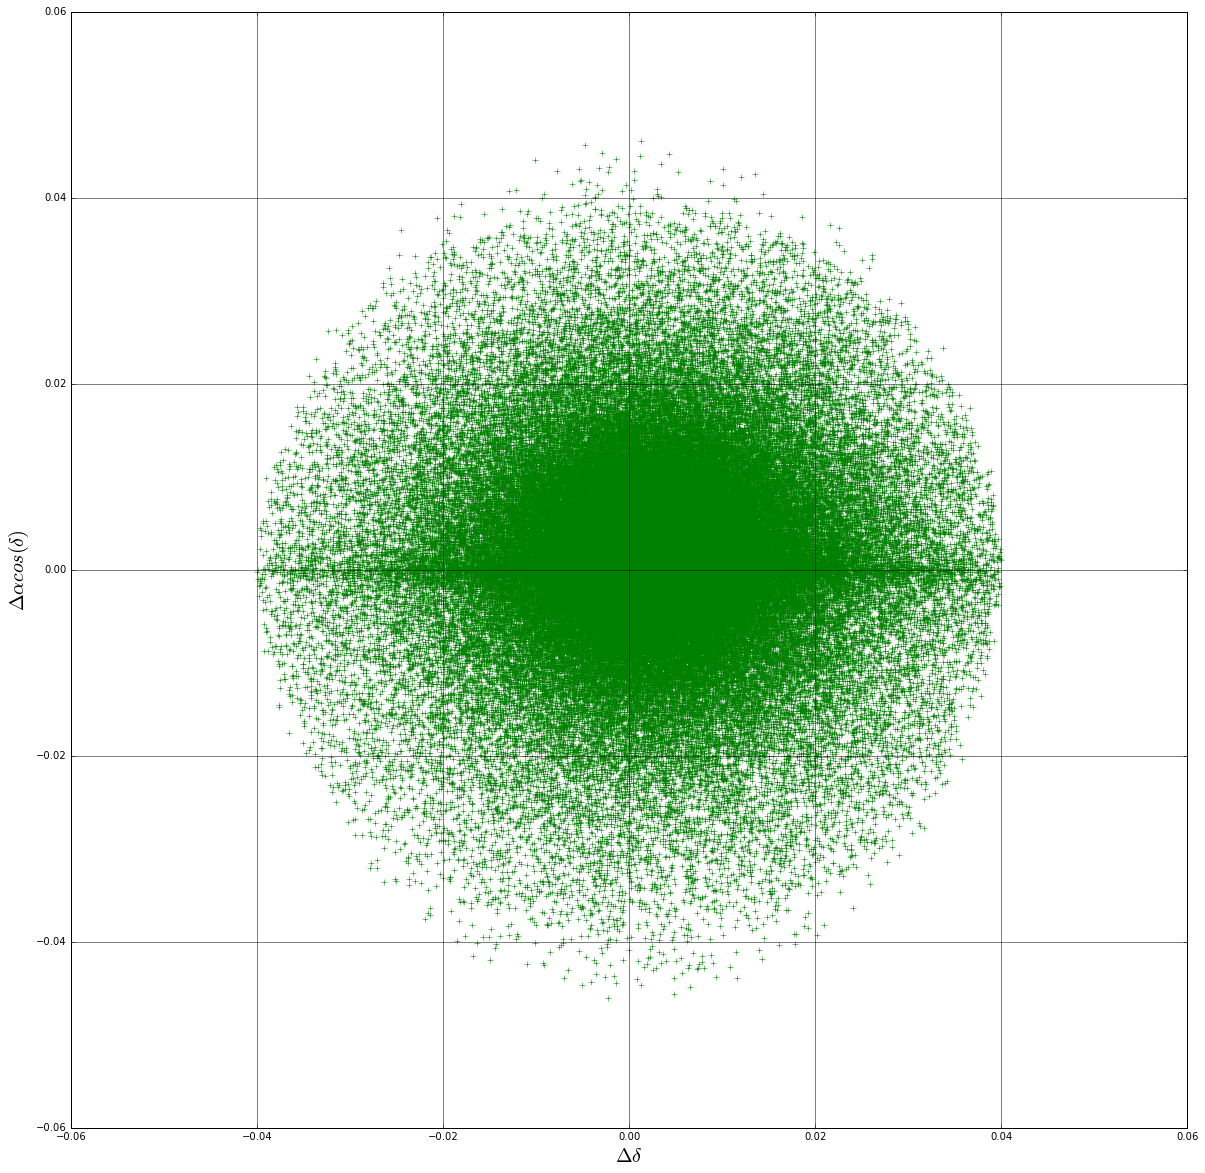

In [133]:
ra_dec_graph('/home/calum/Documents/Mphys_data/mgs_multiwavelength/xmatch_large_galex.npy',limit=0.06)

-0.00129434074592
180639


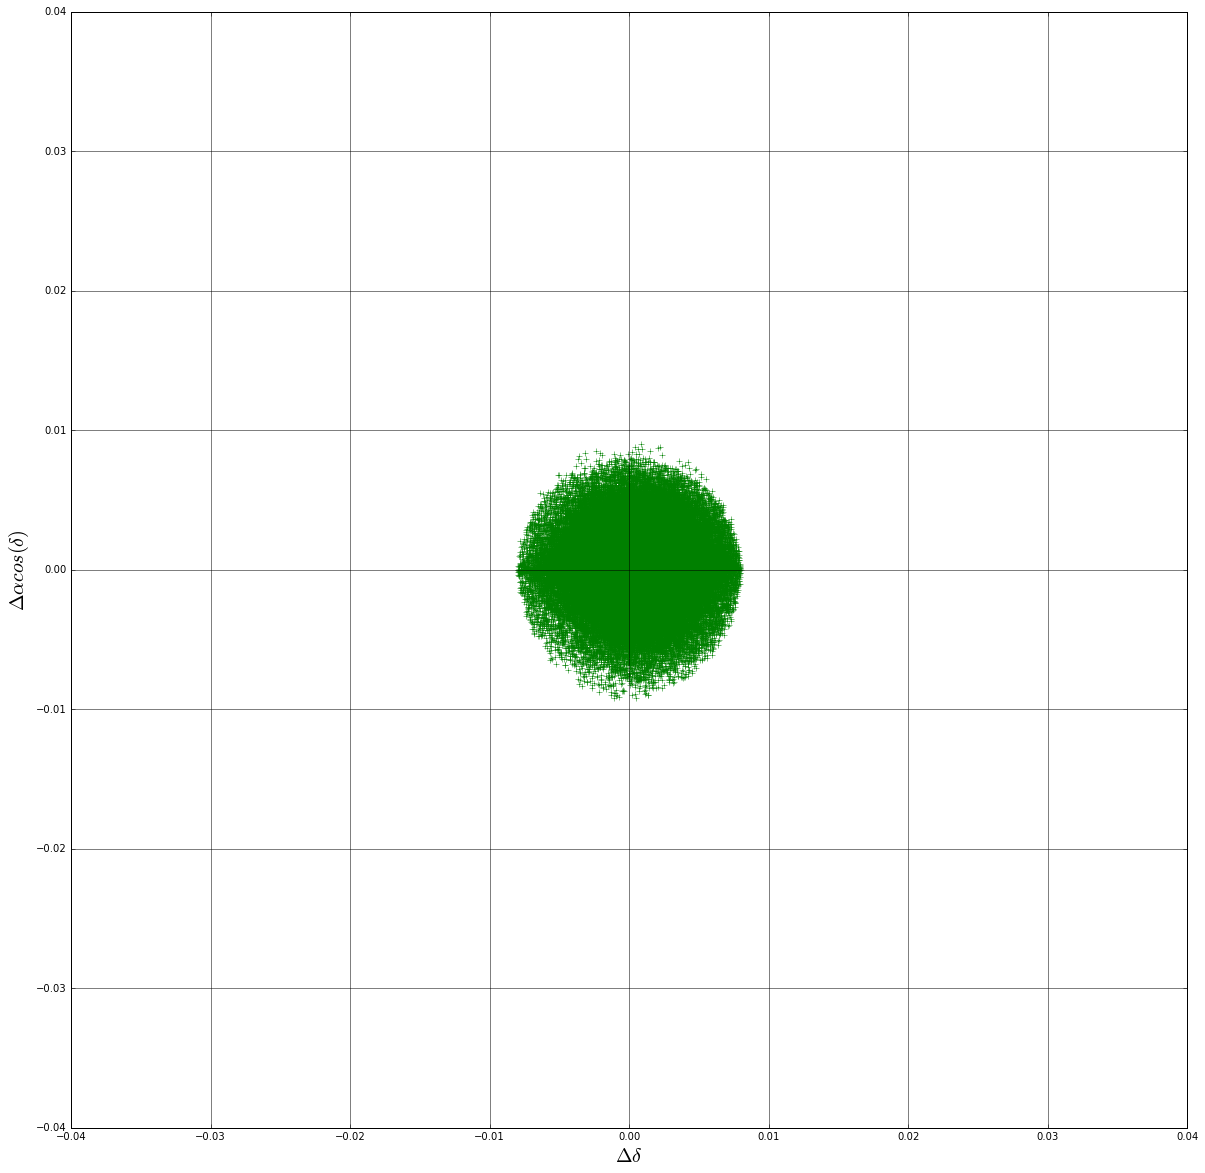

In [134]:
ra_dec_graph('/home/calum/Documents/Mphys_data/mgs_multiwavelength/xmatch_large_wise.npy',limit=0.04)

0.00311047643797
167665


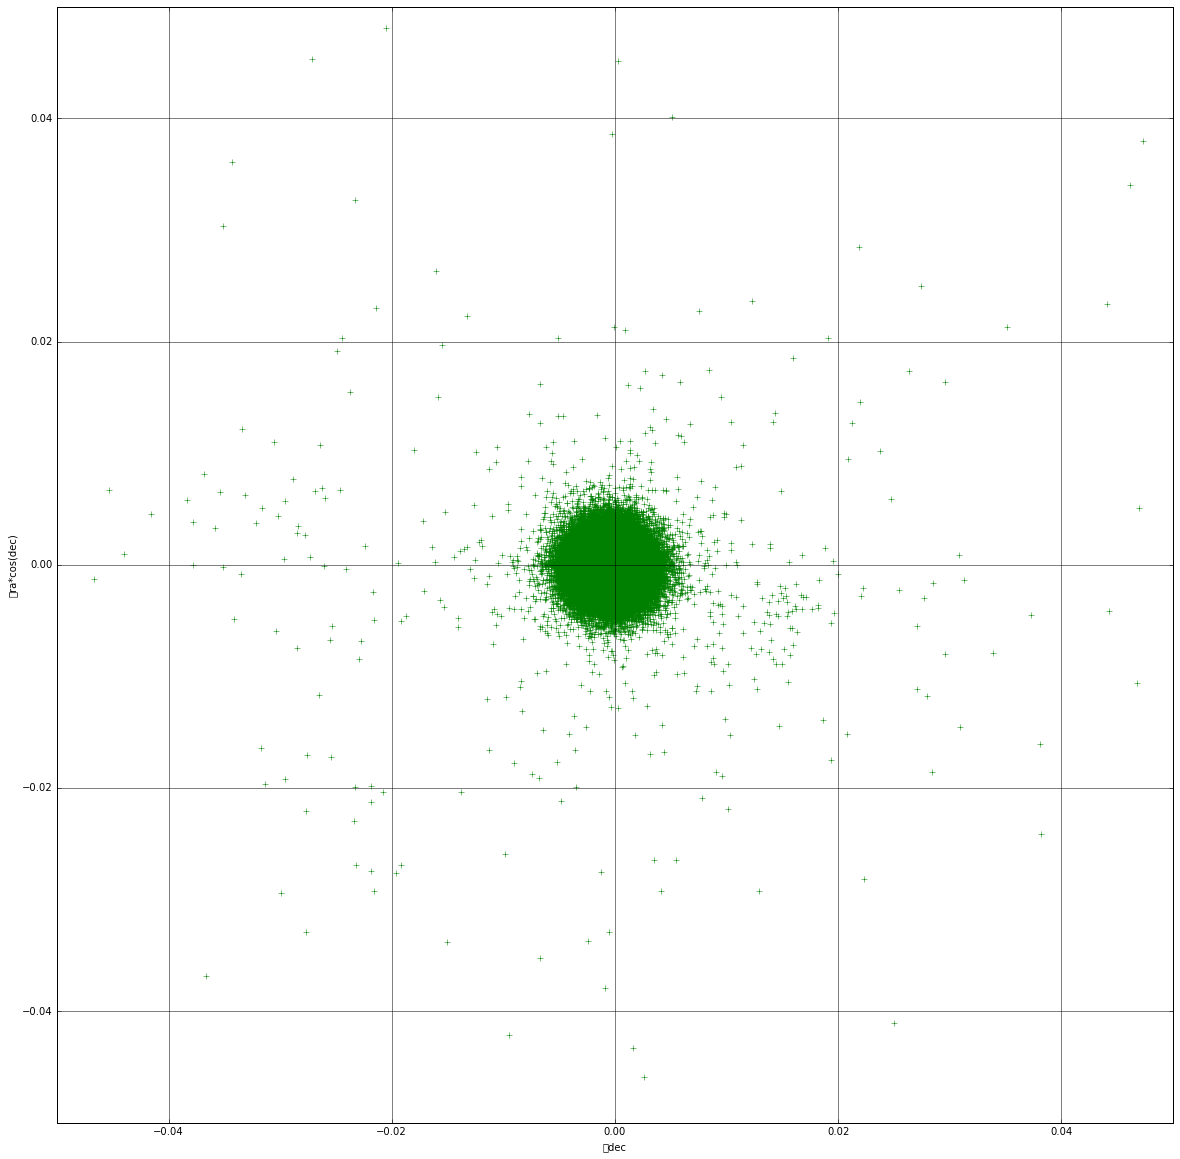

In [54]:
ra_dec_graph('/home/calum/Documents/Mphys_data/mgs_multiwavelength/xmatch_small_sdss.npy', limit=0.05)

(0, 0.02)

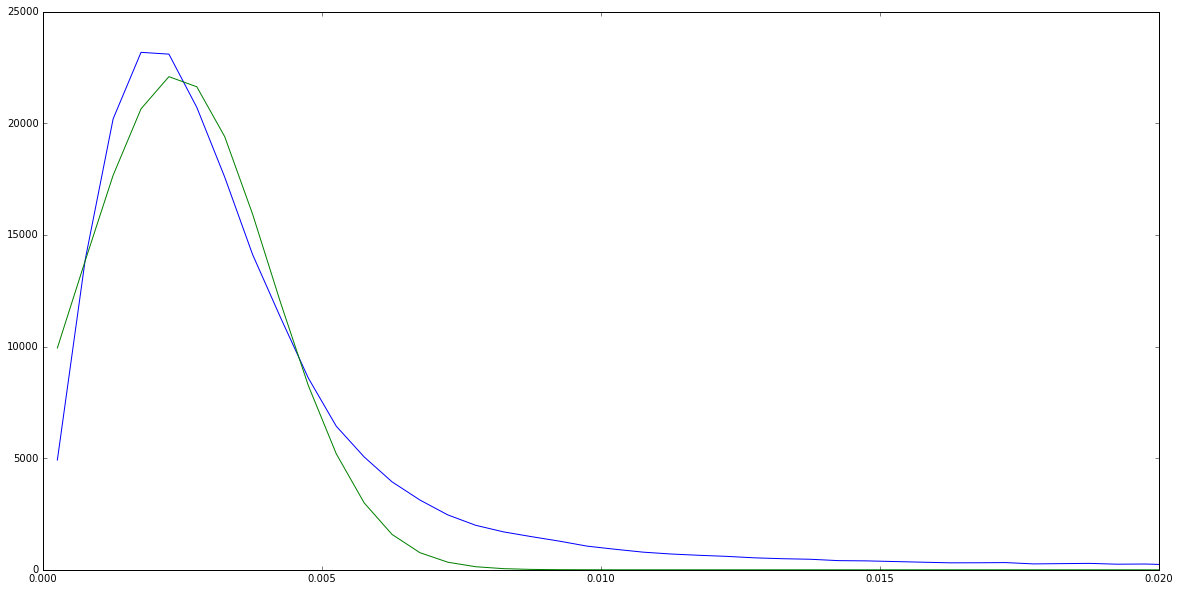

In [20]:
# Define model function to be used to fit to the data above:
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
p0 = [1., 2., 1.]

coeff, var_matrix = curve_fit(gauss, x, y, p0=p0)

# Get the fitted curve
hist_fit = gauss(x_full, *coeff)

plt.figure(figsize=(20,10))
plt.plot(x_full, y_full, label='Test data')
plt.plot(x_full, hist_fit, label='Fitted data')
plt.xlim(0,0.02)

-0.0384406998737
162796


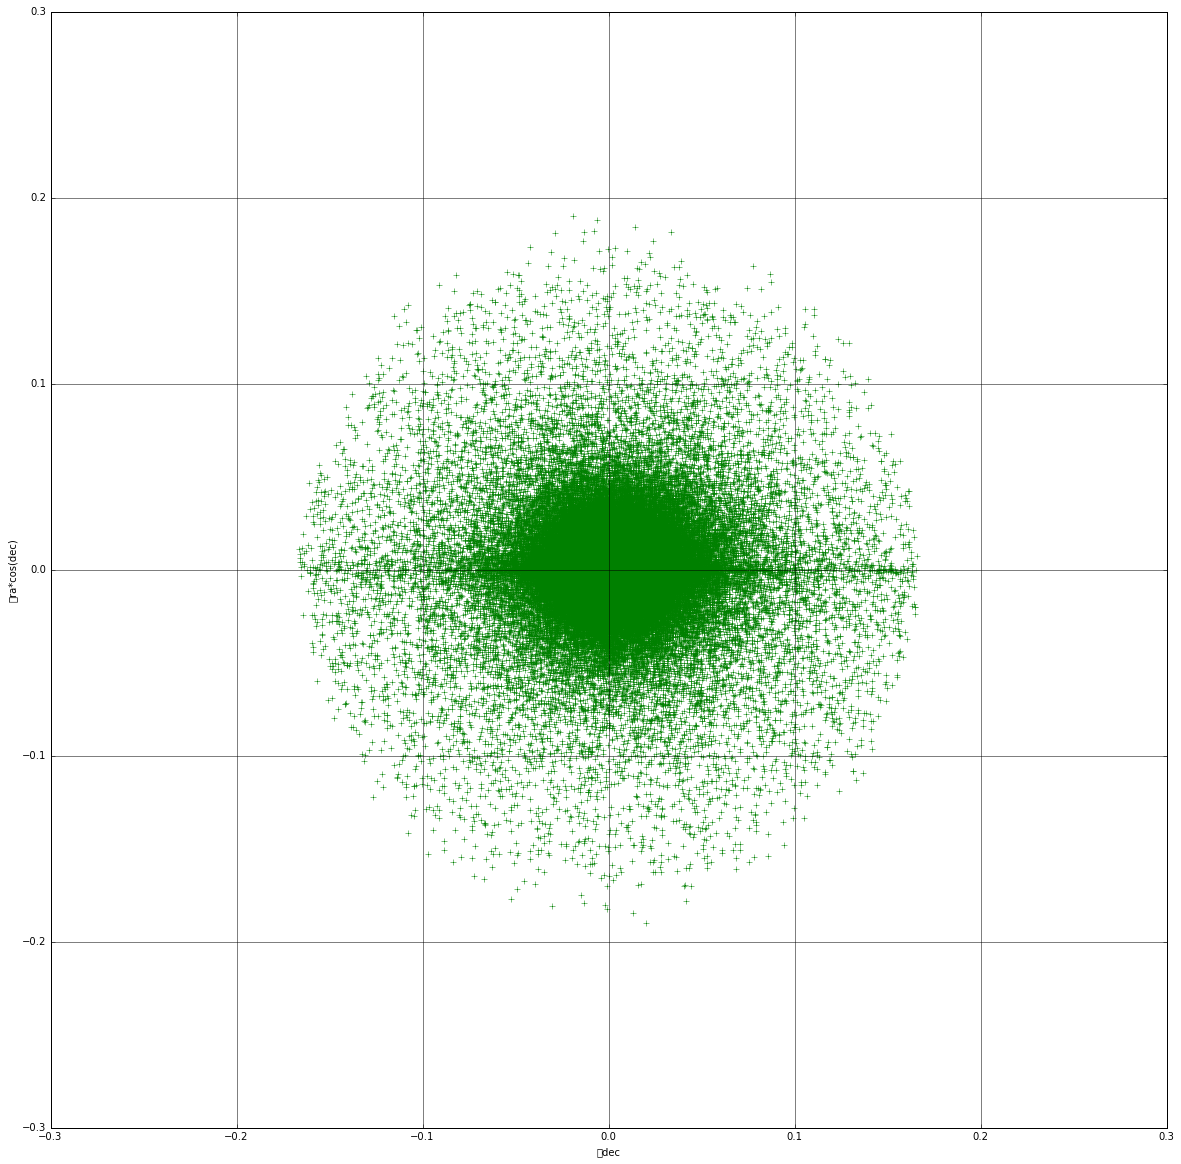

In [56]:
ra_dec_graph('/home/calum/Documents/Mphys_data/mgs_multiwavelength/xmatch_nearest_galex.npy', limit=0.3)

135232


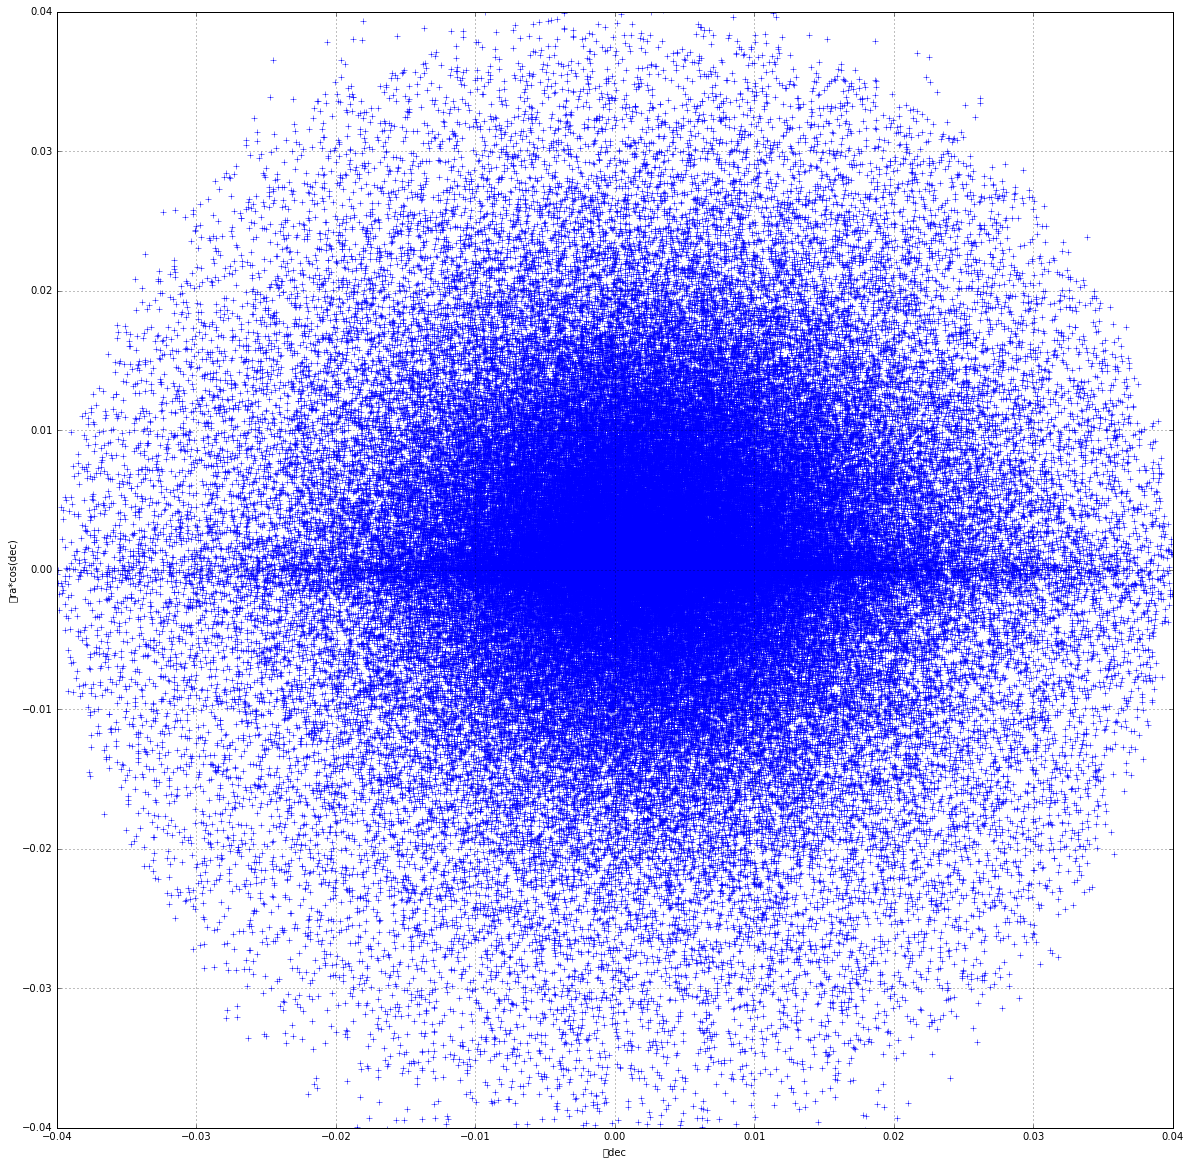

In [32]:
ra_dec_graph('/home/calum/Documents/Mphys_data/mgs_multiwavelength/xmatch_large_galex.npy',limit=0.04)

96589


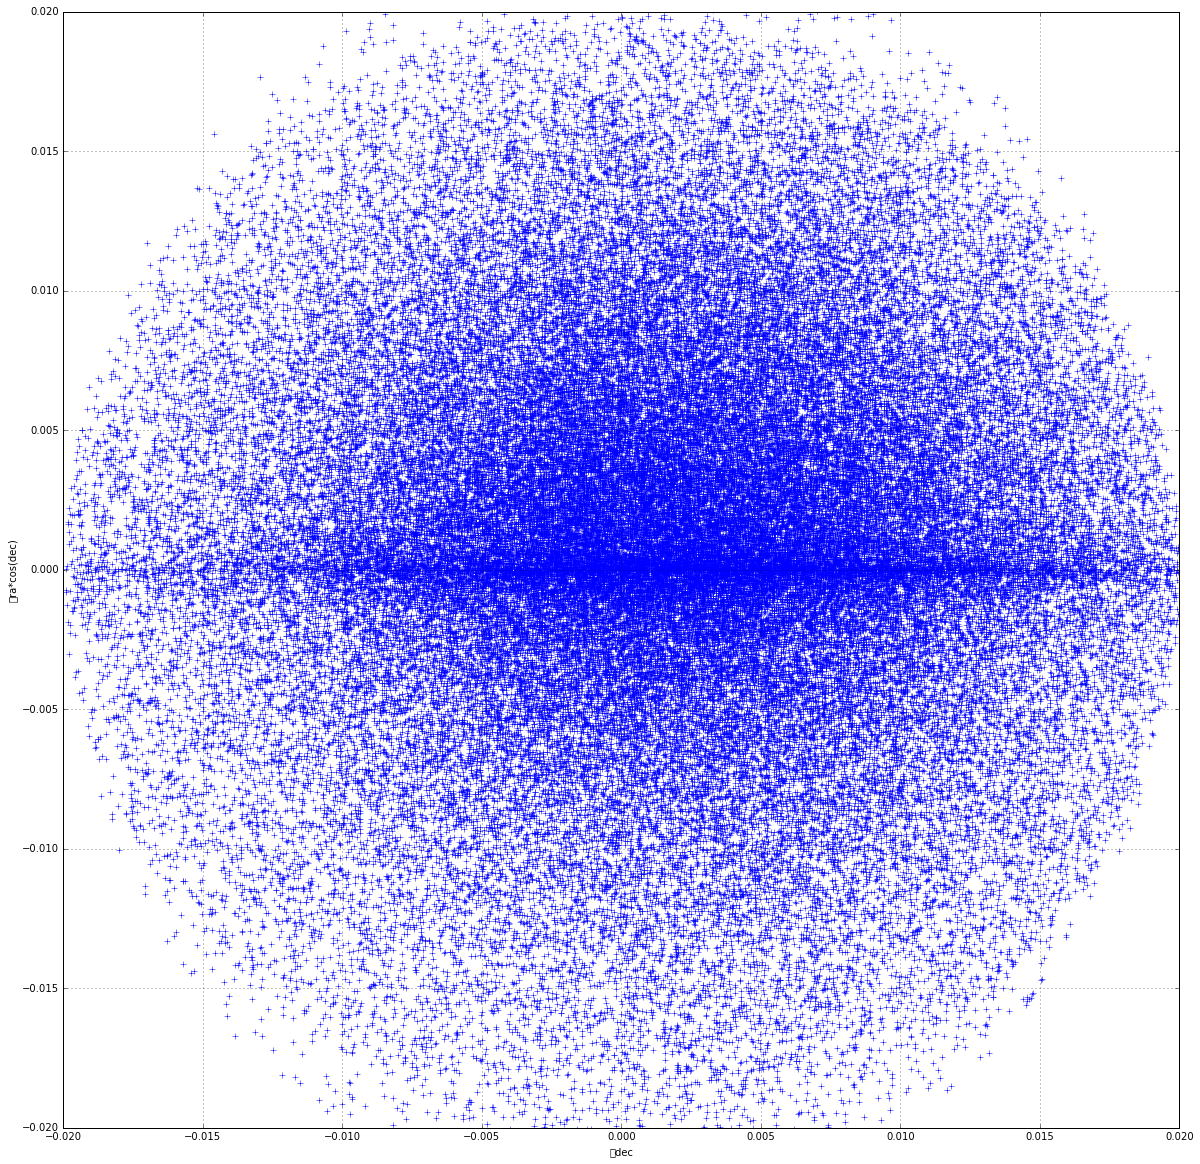

In [34]:
ra_dec_graph('/home/calum/Documents/Mphys_data/mgs_multiwavelength/xmatch_small_galex.npy',limit=0.02)

180639


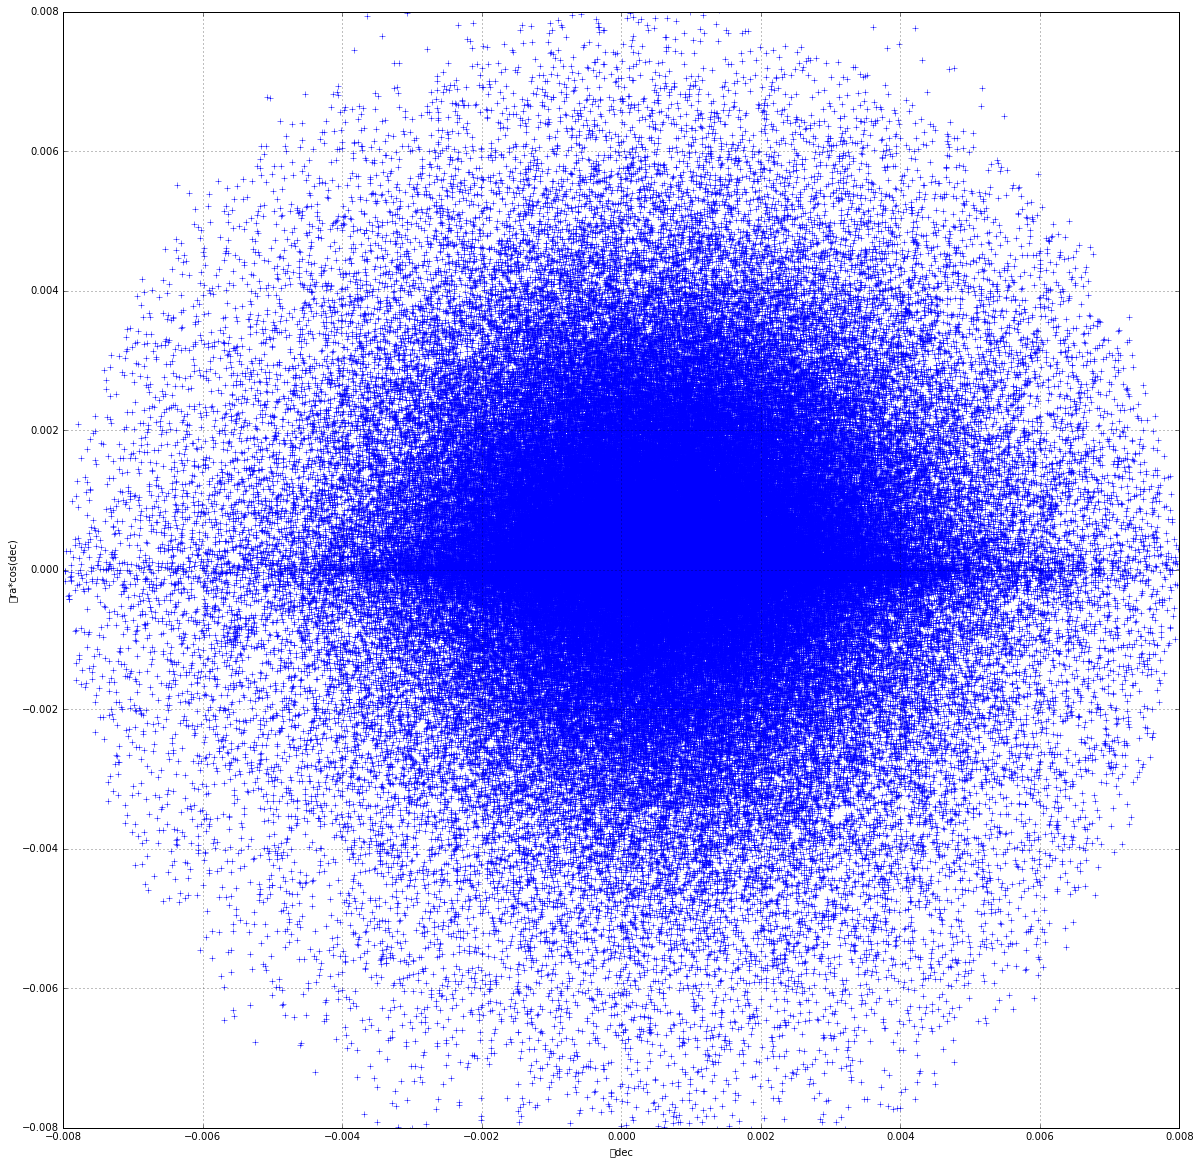

In [38]:
ra_dec_graph('/home/calum/Documents/Mphys_data/mgs_multiwavelength/xmatch_large_wise.npy',limit=0.008)